In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = 100 # 簇的数量
agent = 20 # 智能体的个数

In [3]:
dataset_path = r"D:\Documents\QG工作室\工作室考核\中期考核\数据集\s1.txt"
network_path = r"D:\Documents\QG工作室\工作室考核\中期考核\数据集\switch_network1.npz"

In [4]:
As = np.load(network_path)
As = [As['A1'], As['A2'], As['A3']]

In [5]:
Y = []
with open(dataset_path, 'r') as file:
    lines = file.readlines()
    for oneline in lines:
        oneline = oneline[:-1]
        oneline = oneline.split()
        Y.append([float(oneline[0]),float(oneline[1])])
Y = np.array(Y) # 原始数据集

In [6]:
m = Y.shape[0]  # 数据的总个数
mi = int(m/agent) # 每个智能体分到的数据量

In [7]:
Yis = []
idx = np.arange(m)    
np.random.shuffle(idx) # 打乱
for i in range(agent):
    Yis.append(Y[idx[i*mi:(i+1)*mi]]) # 每个智能体对应处理多少数据
Yis = np.array(Yis)

In [86]:
cik = []
first_num = np.random.randint(0,agent)
first_idx_ = np.random.randint(0,mi)
cik.append(Yis[first_num][first_idx_])  # 随机选取第一个聚类中心

for i in range(k-1):
    large_dis = []                  # 每个智能体处理的数据中与聚类中心距离最大值
    large_idx = []                    # 每个智能体里数据与聚类中心距离最大的索引
    for j in range(agent):         # j是智能体
        min_dc_dis = []
        for y in Yis[j]:           # y是每个智能体处理的数据
            data_cluster_dis = []  # 每个数据与所有聚类中心的距离
            for cluster in cik:   # cluster是每个聚类中心
                data_cluster_dis.append(np.linalg.norm(y-cluster))
            min_dc_dis.append(np.min(data_cluster_dis))
        min_dc_dis = np.array(min_dc_dis)
        large_dis.append(np.max(min_dc_dis))
        large_idx.append(np.argmax(min_dc_dis)) 
    large_dis = np.array(large_dis)
    large_agent_idx = np.argmax(large_dis)
    cik.append(Yis[large_agent_idx][large_idx[large_agent_idx]])
cik = np.array(cik)
cik

array([[612485., 518009.],
       [139601., 914203.],
       [270729.,  67329.],
       [854996.,  81095.],
       [674114., 970756.],
       [186380., 487625.],
       [961951., 577029.],
       [558307., 203307.],
       [425260., 773661.],
       [819768., 346596.],
       [767482., 727417.],
       [408714., 391412.],
       [155625., 262321.],
       [370259., 585265.],
       [216846., 737568.],
       [ 34795., 606311.],
       [791355., 529644.],
       [380281., 205779.],
       [595580., 798572.],
       [332237., 911313.],
       [642157., 345545.],
       [436641.,  55171.],
       [746769., 205186.],
       [538571., 654649.],
       [925732., 210388.],
       [789095., 895634.],
       [276794., 384458.],
       [102983., 382712.],
       [697959., 614701.],
       [172756., 612694.],
       [888892., 702505.],
       [257841., 193878.],
       [894785., 440382.],
       [546166., 423311.],
       [714443., 433876.],
       [239387., 847822.],
       [683413., 861559.],
 

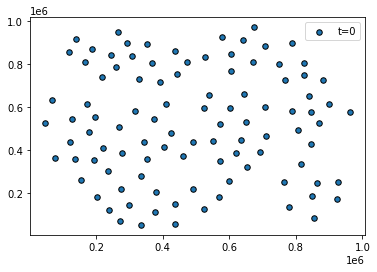

In [10]:
plt.scatter(cik[:,0], cik[:,1], s=30, edgecolor='k', label=f"t={0}")
plt.legend()
plt.pause(0.01)

In [98]:
ci = cik
c = []

array([[612485., 518009.],
       [139601., 914203.],
       [270729.,  67329.],
       [854996.,  81095.],
       [674114., 970756.],
       [186380., 487625.],
       [961951., 577029.],
       [558307., 203307.],
       [425260., 773661.],
       [819768., 346596.],
       [767482., 727417.],
       [408714., 391412.],
       [155625., 262321.],
       [370259., 585265.],
       [216846., 737568.],
       [ 34795., 606311.],
       [791355., 529644.],
       [380281., 205779.],
       [595580., 798572.],
       [332237., 911313.],
       [642157., 345545.],
       [436641.,  55171.],
       [746769., 205186.],
       [538571., 654649.],
       [925732., 210388.],
       [789095., 895634.],
       [276794., 384458.],
       [102983., 382712.],
       [697959., 614701.],
       [172756., 612694.],
       [888892., 702505.],
       [257841., 193878.],
       [894785., 440382.],
       [546166., 423311.],
       [714443., 433876.],
       [239387., 847822.],
       [683413., 861559.],
 

In [14]:
m_th = 0.1
ux_th = uy_th = 0.1
s = 0

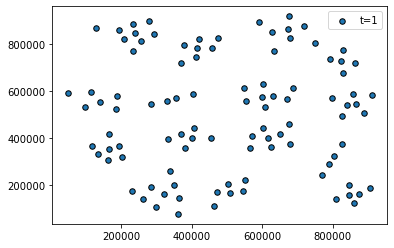

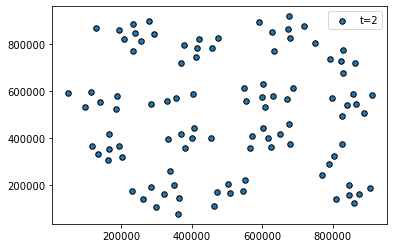

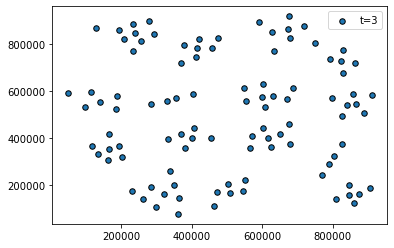

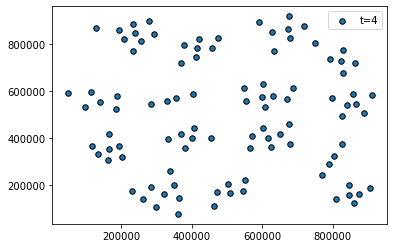

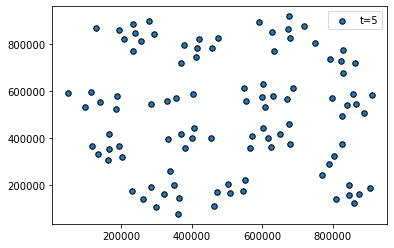

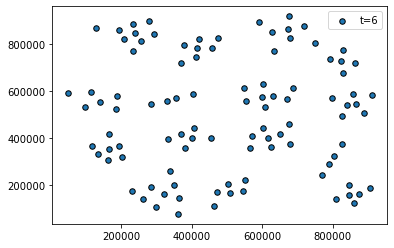

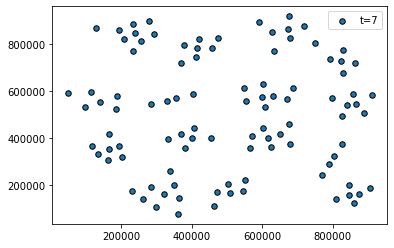

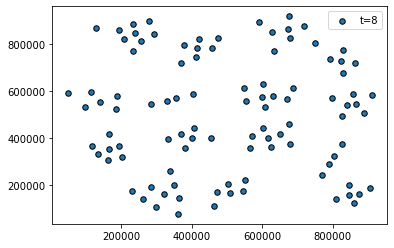

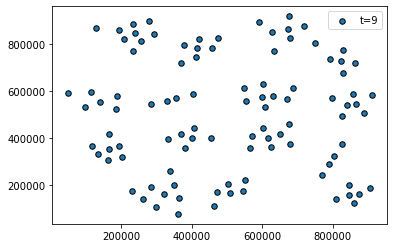

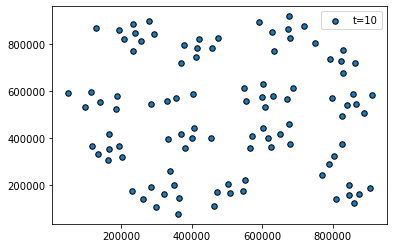

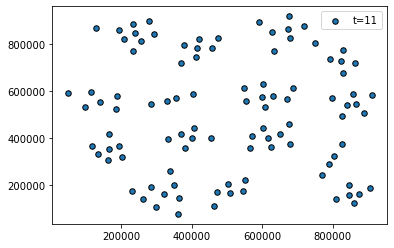

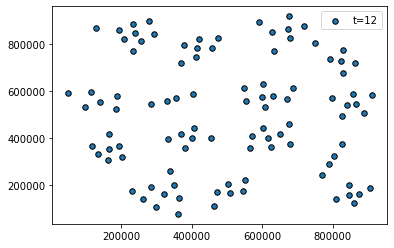

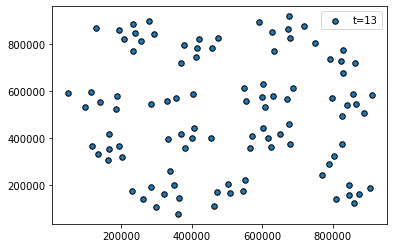

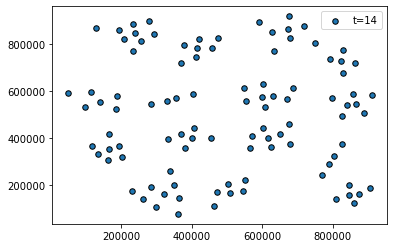

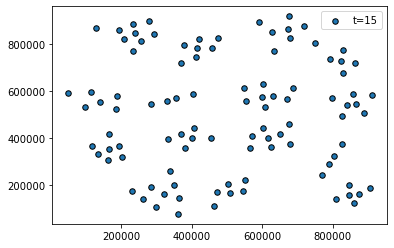

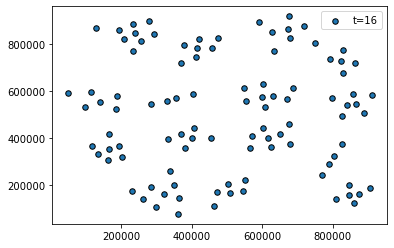

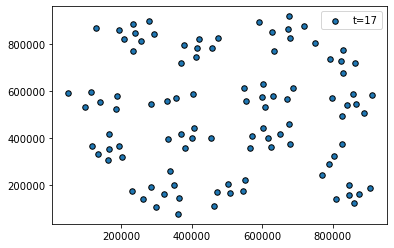

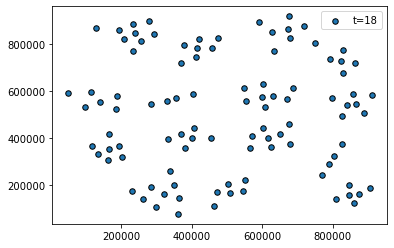

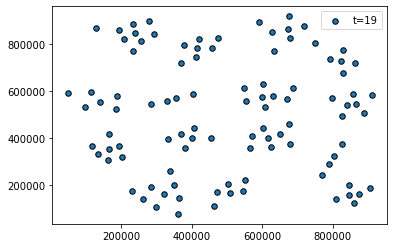

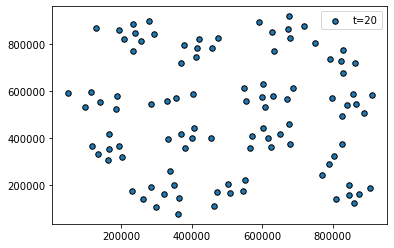

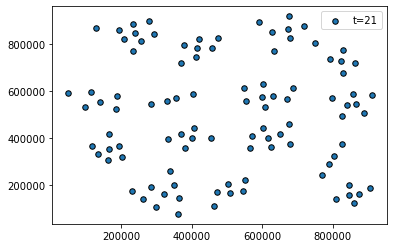

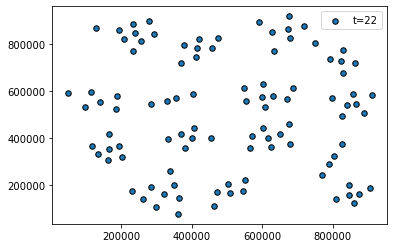

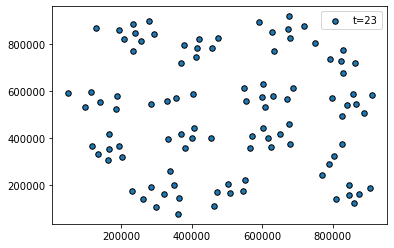

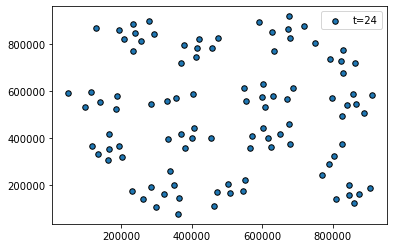

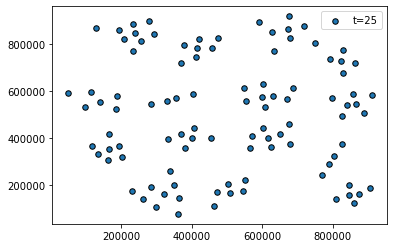

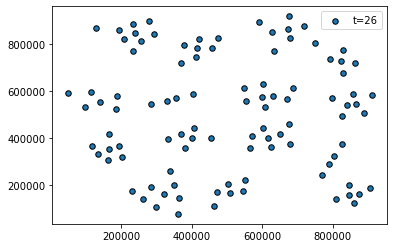

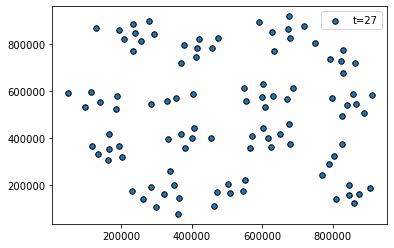

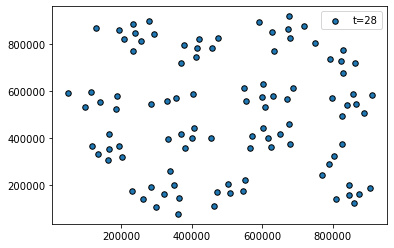

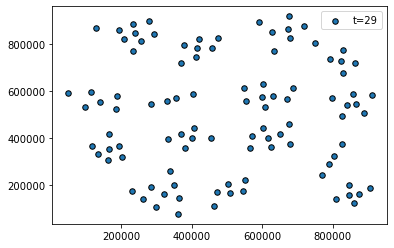

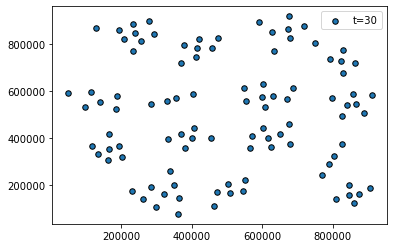

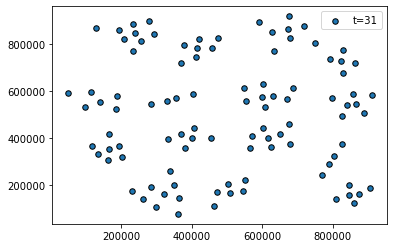

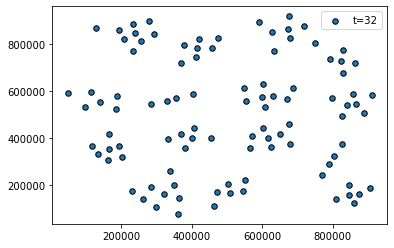

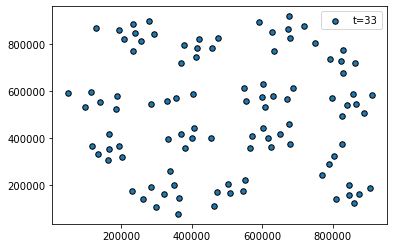

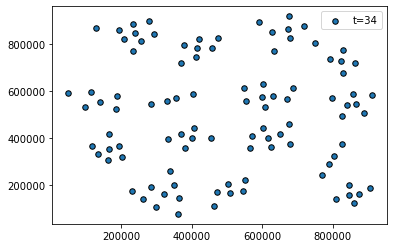

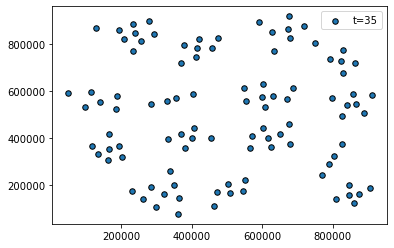

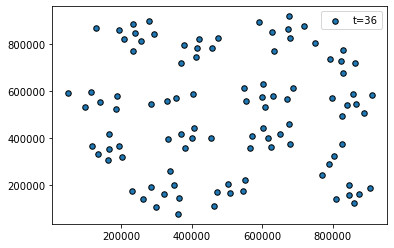

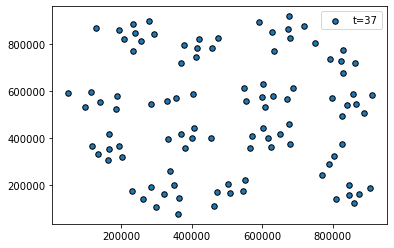

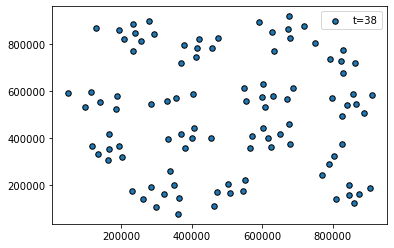

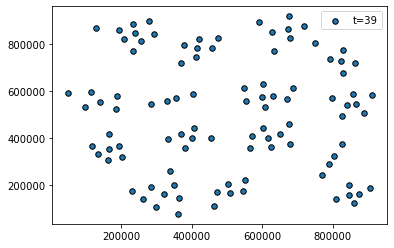

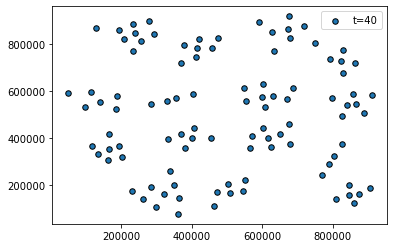

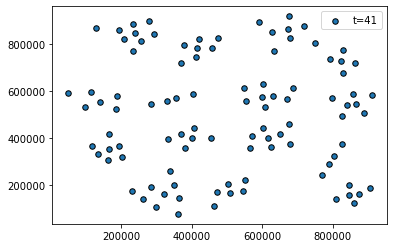

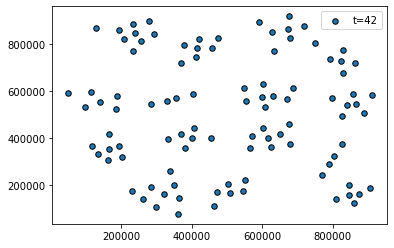

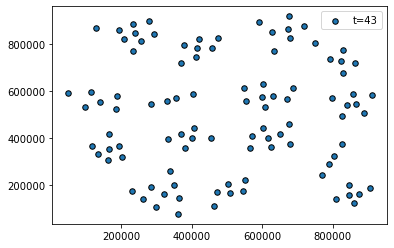

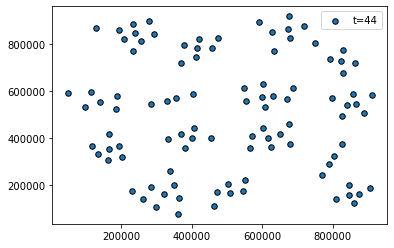

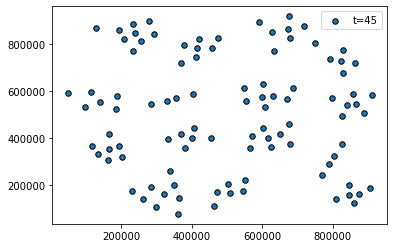

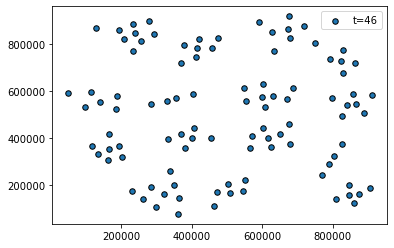

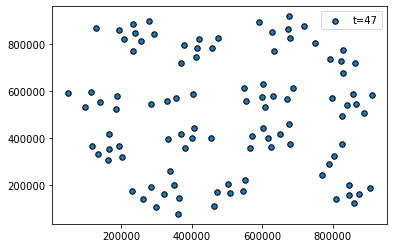

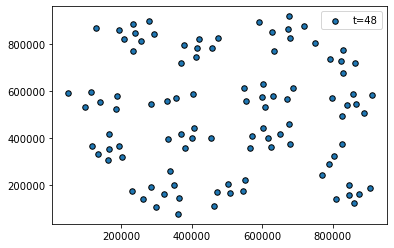

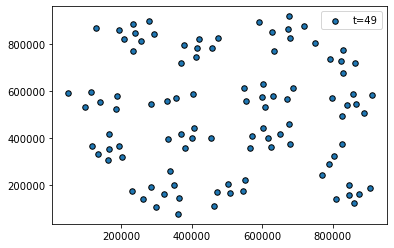

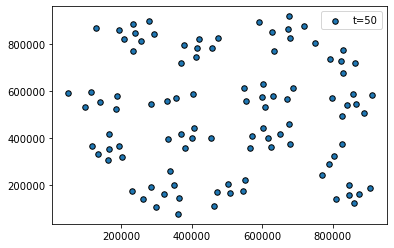

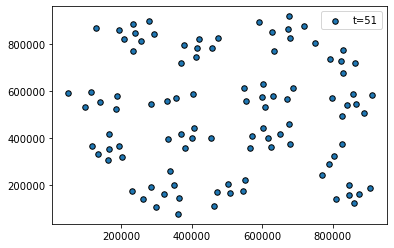

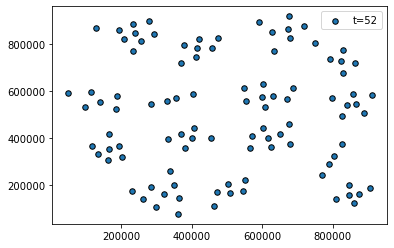

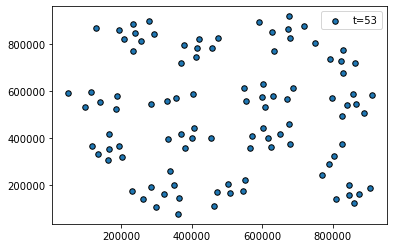

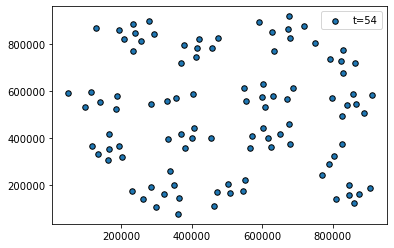

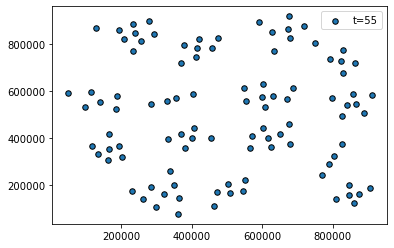

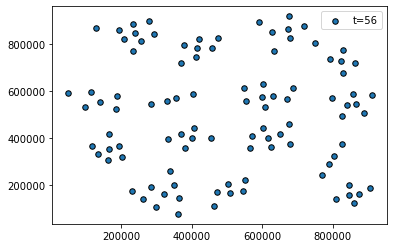

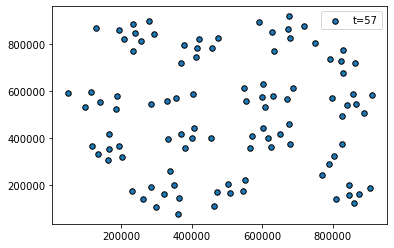

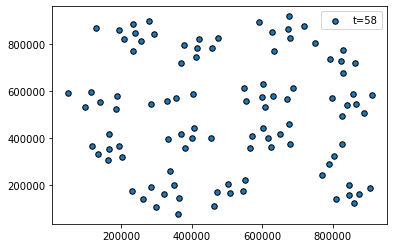

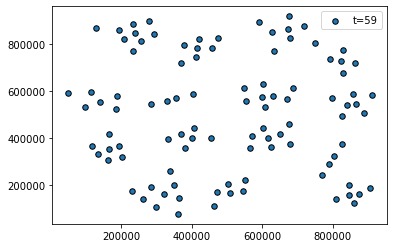

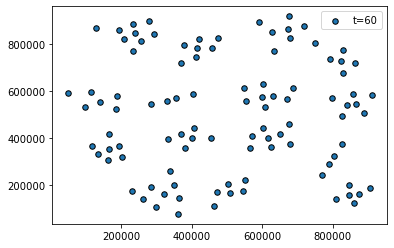

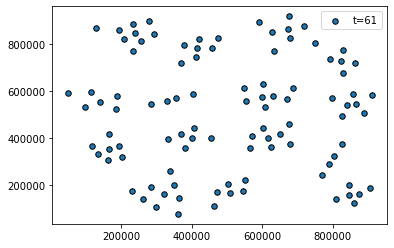

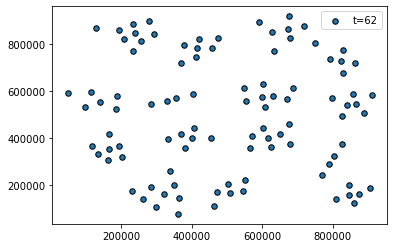

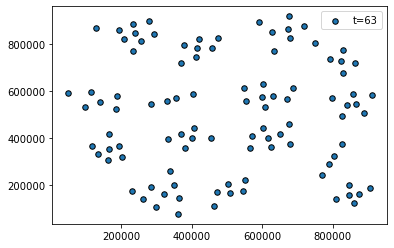

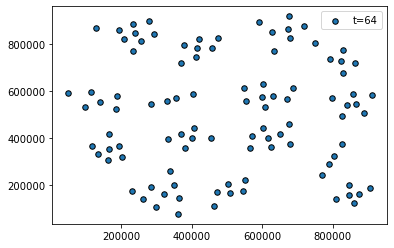

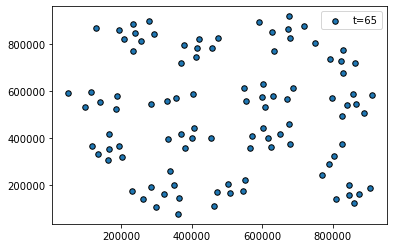

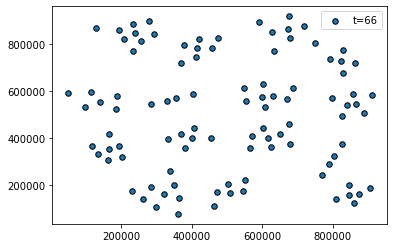

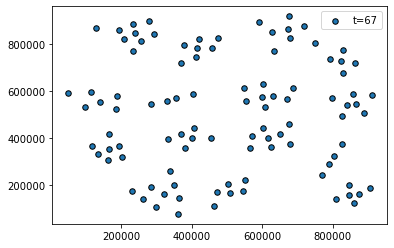

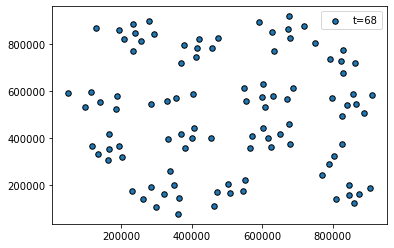

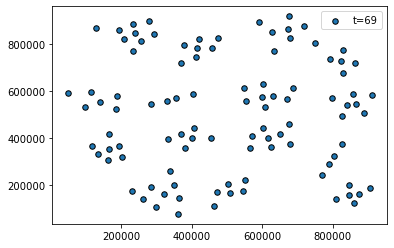

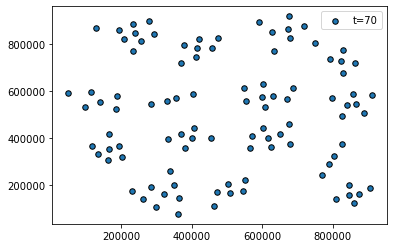

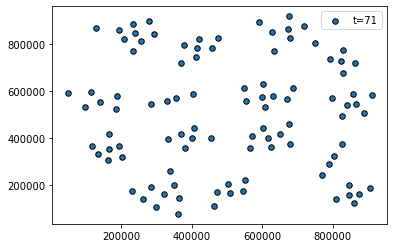

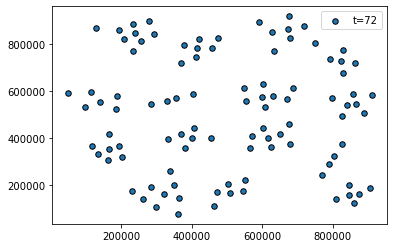

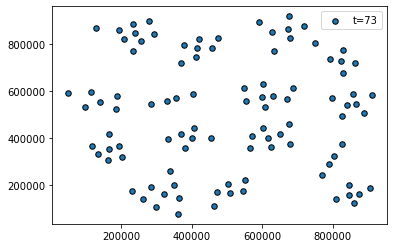

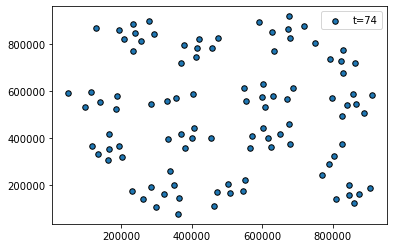

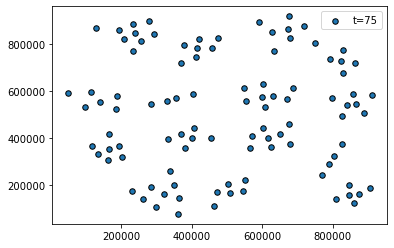

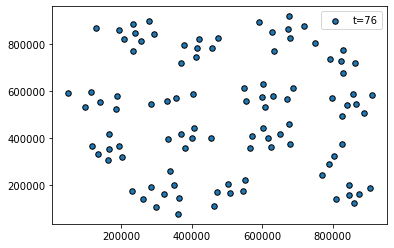

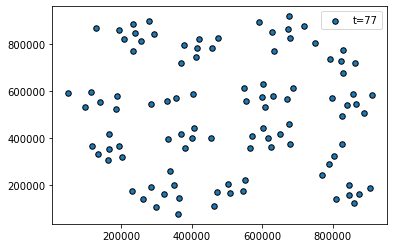

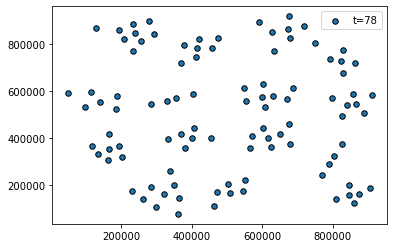

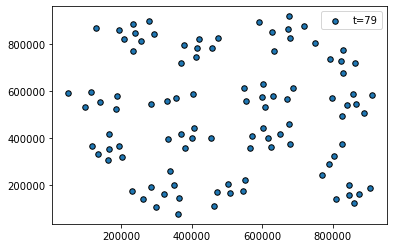

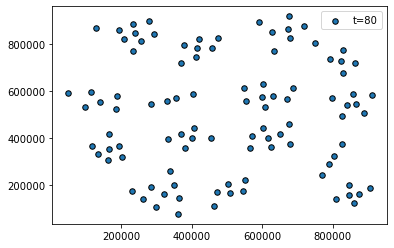

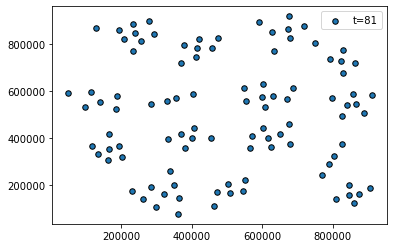

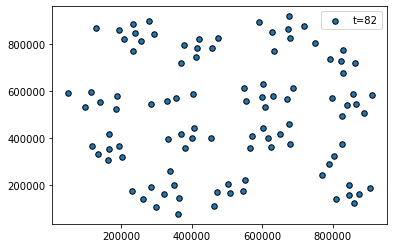

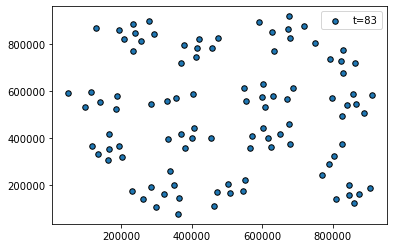

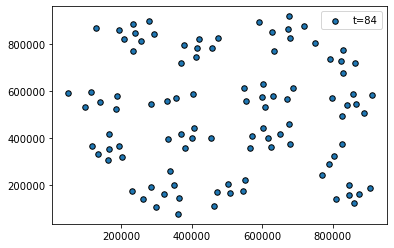

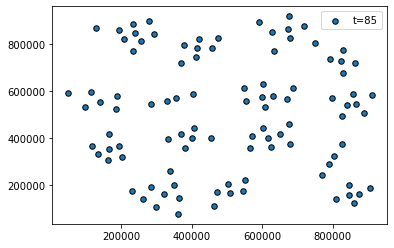

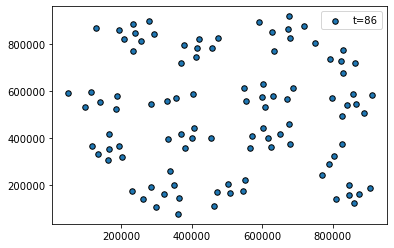

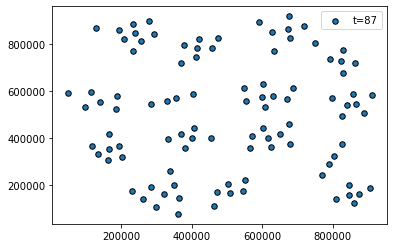

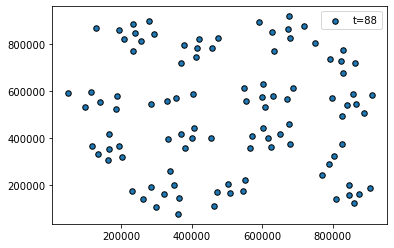

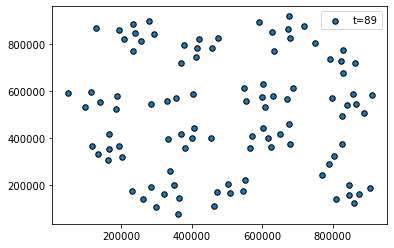

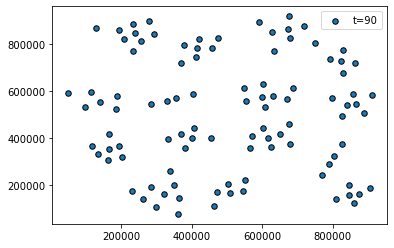

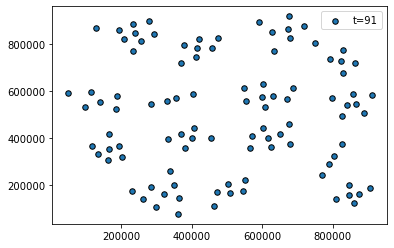

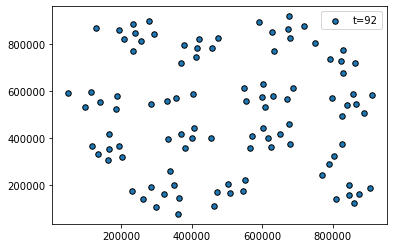

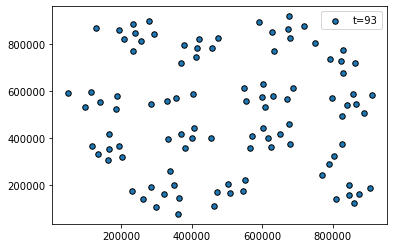

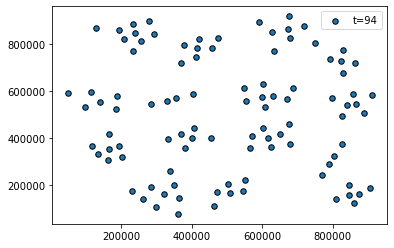

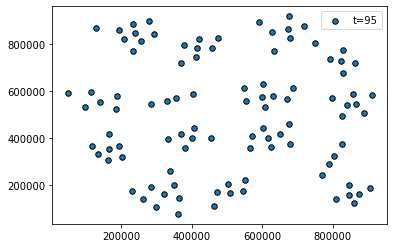

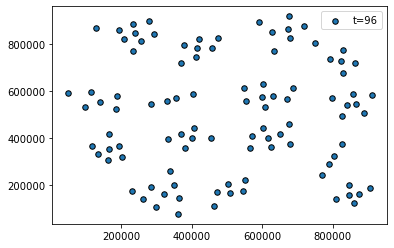

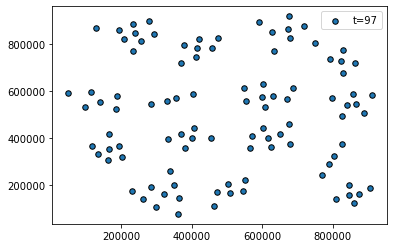

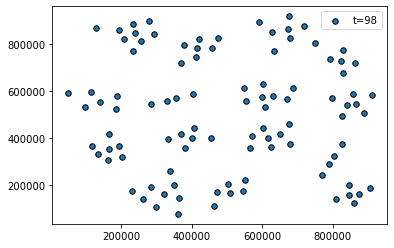

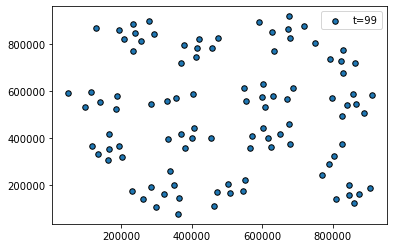

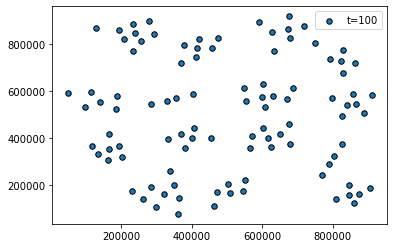

In [102]:
# 随时间变化
for t in range(100):
    mik = [[0 for i in range(k)] for j in range(agent)] # 20*100 点的个数
    uik = [[np.array([0.,0.]) for i in range(k)] for j in range(agent)] # 数据的和
    for i in range(agent):
        last_cik = c[-1] # 最新簇的位置
        for j in range(mi):
            distance = np.linalg.norm(last_cik - Yis[i][j],axis=1)
            cluster = np.argmin(distance)
            uik[i][cluster] += Yis[i][j]
            mik[i][cluster] += 1
    uik = np.array(uik)
    data_x = uik[:,:,0]
    data_y = uik[:,:,1]
    data_num = np.mat(mik)
    
    while True:
        try:
            A_temp = np.mat(As[s % 3]) # 获取通信拓扑结构 3n
            data_num = A_temp * data_num
            data_x = A_temp * data_x
            data_y = A_temp * data_y
            # 判断是否一致
            m_mean = data_num.mean(axis = 0)
            m_dis = np.abs(data_num - m_mean).mean()  # m的总差距
            ux_mean = data_x.mean(axis=0)
            uy_mean = data_y.mean(axis=0)
            ux_dis = np.abs(data_x - ux_mean).mean()  # ux的总差距
            uy_dis = np.abs(data_y - uy_mean).mean()  # uy的总差距
            
            if m_dis <= m_th and ux_dis <= ux_th and uy_dis < uy_th:
                break
        finally:
            s += 1
    data_num[data_num == 0] = 1
    cik_x = (data_x / data_num).A
    cik_y = (data_y / data_num).A
    c.append(np.array(list(zip(cik_x[0],cik_y[0]))))
    plt.scatter(c[-1][:,0], c[-1][:,1], s=30, edgecolor='k', label=f"t={t+1}")
    plt.legend()
    plt.pause(0.01)

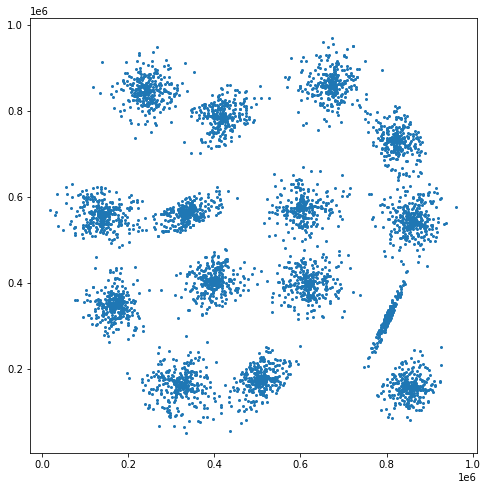

In [103]:
plt.figure(figsize=(8, 8))
plt.scatter(Y[:, 0], Y[:, 1], s=4)